# Carregamento de Dados

Objetivos dessa aula:
* Carregar dados reais do Pytorch
* Implementar o fluxo de treinamento completo de uma rede

## Hiperparâmetros

Com o objetivo de simplificar a compreensão e a manutenção do código, é recomendado manter consistentemente no início os seguintes elementos:

* imports de pacotes
* configuração de hiperparâmetros
* definição do hardware padrão utilizado

Durante esta aula, será necessário utilizar uma GPU para lidar com dados reais. Recomenda-se executar o mesmo código em outro momento, sem a utilização da GPU, para experimentar as vantagens que ela oferece no contexto de redes neurais.

Caso esteja utilizando o pytorch pela primeira vez é necessário realizar a instalação do pacote por meio do comando: 
`
conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
`

# Import de pacotes

```
import torch
from torch import nn, optim

from torchvision import datasets
from torchvision import transforms 

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import time
```

In [7]:
import torch
from torch import nn, optim

from torchvision import datasets
from torchvision import transforms 

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import time

# Configuração de hiperparâmetros
```
args = {
    'batch_size': 5,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

print(args['device'])
```

In [65]:
args = {
    'batch_size': 50,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

print(args['device'])

cuda


## Datasets

O PyTorch possui dois pacotes que trazem datasets prontos para uso.

* Torchtext: https://torchtext.readthedocs.io/en/latest/datasets.html
* Torchvision: https://pytorch.org/docs/stable/torchvision/datasets.html

Como os nomes indicam, são datasets de textos (text) e imagens (vision), duas aplicações onde redes neurais são muito bem sucedidas.

Para aplicações com textos e outros tipos de séries temporais, o carregamento de dados possui nuances que dificultam o entendimento, portanto vamos concentrar no carregamento de imagens.

### Torchvision datasets

Para trabalhar com datasets do pacote torchvision, basta
* Importar o pacote
``` python 
from torchvision import datasets 
```
* Carregar o dataset do seu interesse (ex: MNIST)
``` python 
data = datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
```

Documentação: https://pytorch.org/docs/stable/torchvision/datasets.html

### Torchvision transforms

Durante o curso de visão computacional, serão abordadas as nuances das transformações de imagens. No entanto, é importante ressaltar que, independentemente do dataset utilizado, é necessário convertê-lo em um tensor para alimentar uma rede em PyTorch. Essa conversão pode ser realizada durante o processo de carregamento dos dados, bastando seguir os seguintes passos:

* Importar o pacote transforms
``` python 
from torchvision import transforms 
```
* preencher o parâmetro ```tranform``` do dataset com a função que converte para tensor.
``` python 
transforms.ToTensor() 
```

Pronto! Quando seu dado for carregado, ele passará pela transformação indicada no parâmetro ```tranform```, nesse caso, convertendo o dado para um tensor.

Documentação: https://pytorch.org/docs/stable/torchvision/transforms.html

```
train_set = datasets.MNIST('./', 
                           train=True, 
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de Teste:' + str(len(test_set)))
```


In [19]:
train_set = datasets.MNIST('./', 
                           train=True, 
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=False)

print('Amostras de treino: ' + str(len(train_set)) + '\nAmostras de Teste:' + str(len(test_set)))

Amostras de treino: 60000
Amostras de Teste:10000


Cada dataset possui uma implementação específica internamente no pytorch. Verifique o ```type``` da variável que recebeu os dados e veja que se refere a uma classe específica do dataset.

No entanto, o item de qualquer dataset **sempre será uma tupla ```(dado, rótulo)```**. 
```
print(type(train_set))
print(type(train_set[0]))
```

In [46]:
print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


Podemos então iterar no dataset para observar algumas amostras e seus rótulos.

```
for i in range(3):
    dado, rotulo = train_set[i]

    plt.figure()
    plt.imshow(dado[0])
    plt.title('Rotulo: '+ str(rotulo))
```

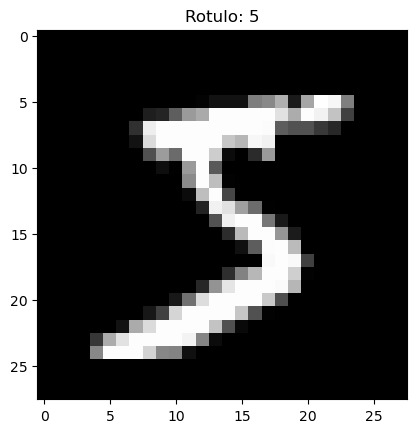

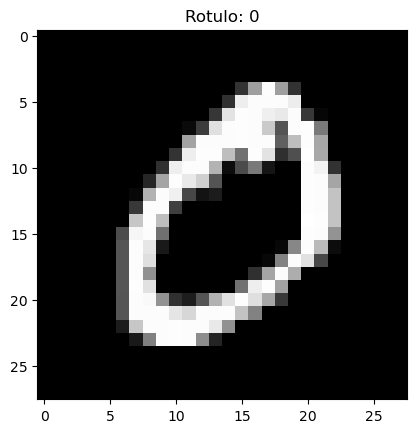

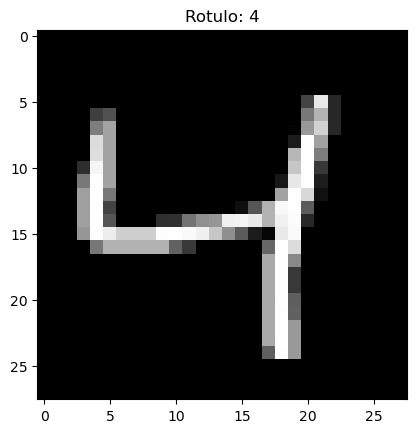

In [48]:
for i in range(3):
    dado, rotulo = train_set[i]

    plt.figure()
    plt.imshow(dado[0], cmap="gray")
    plt.title('Rotulo: '+ str(rotulo))

Temos um total de 70 mil amostras, mas elas **ainda não estão carregadas na memória** (isso seria bastante custoso). A vantagem da classe ```Dataset``` do Pytorch é que as amostras só são carregadas quando necessário.

Sugestão: experimente trocar a transformação do Dataset para
```python
transforms.RandomCrop(12)
```
Essa função realiza um recorte aleatório de ```12 x 12``` (pixels) na imagem. Ao carregar a mesma amostra múltiplas vezes, um novo recorte será feito. 
```
crop_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.RandomCrop(12),
                           download=False)

# Tuple (dado, rótulo)
for i in range(3):
    dado, rotulo = crop_set[0]
  
    plt.figure()
    plt.imshow(dado)
    plt.title('Rótulo: '+ str(rotulo))
```

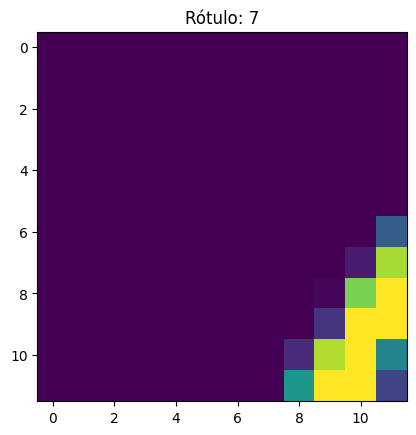

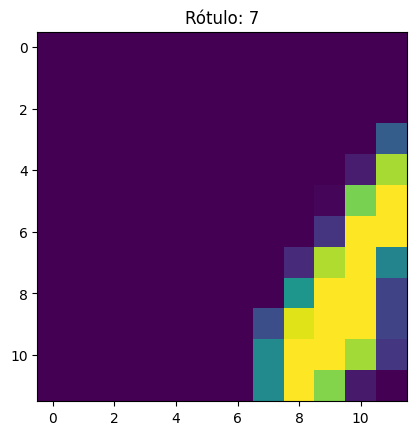

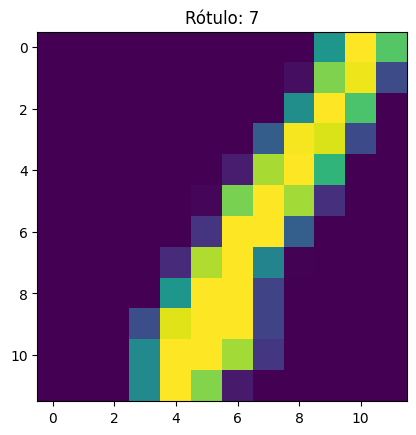

In [6]:
crop_set = datasets.MNIST('./', 
                           train=False, 
                           transform=transforms.RandomCrop(12),
                           download=False)

# Tuple (dado, rótulo)
for i in range(3):
    dado, rotulo = crop_set[0]
  
    plt.figure()
    plt.imshow(dado)
    plt.title('Rótulo: '+ str(rotulo))

Em resumo, cada vez que indexamos um item do dataset, as seguintes operações são realizadas:
* Amostra lida do arquivo e carregada como uma tupla ```(dado, rótulo)```
* As transformações são aplicadas 

## Dataloader

Essa aqui é uma das principais razões do Pytorch ser o pacote preferido de muitos profissionais. O Dataloader gerencia muito bem o carregamento de dados para o treinamento de redes neurais, trazendo as funções: 

* Separação dos dados em batches
* Embaralhando os dados
* Carregando batches em paralelo utilizando threads

O uso de threads no carregamento minimiza períodos ociosos de processamento, visto que a leitura de dados em arquivo é um grande gargalo de tempo.

As três funcionalidades que acabamos de conhecer são controladas pelos parâmetros da chamada do DataLoader.
```python
loader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
```

```
train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])
```


In [50]:
train_loader = DataLoader(train_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

test_loader = DataLoader(test_set, 
                          batch_size=args['batch_size'], 
                          shuffle=True, 
                          num_workers=args['num_workers'])

O objeto retornado é um **iterador**, podendo ser utilizado para iterar em loops mas não suportando indexação.
```
for batch in train_loader:
  
    dado, rotulo = batch
    print(dado.size(), rotulo.size())

    plt.imshow(dado[0][0])
    plt.title('Rotulo: '+ str(rotulo[0]) )
    break
```

torch.Size([5, 1, 28, 28]) torch.Size([5])


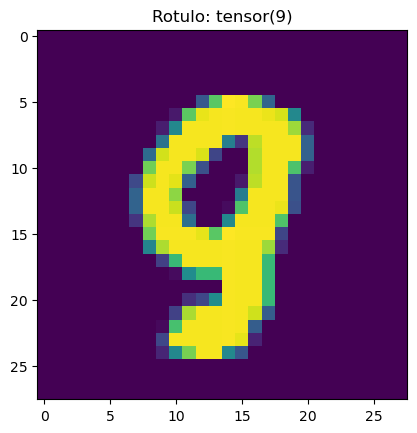

In [53]:
for batch in train_loader:
  
    dado, rotulo = batch
    print(dado.size(), rotulo.size())

    plt.imshow(dado[0][0])
    plt.title('Rotulo: '+ str(rotulo[0]) )
    break

## Implementando o MLP


**Lembrete**: Multi-Layer Perceptrons trabalham somente com dados unidimensionais (vetores). Sendo a imagem com dimensionalidade ```(1, 28, 28)```, precisamos linearizá-la antes de alimentar a rede. Isso implica que o a entrada da rede terá ```input_size = 28 x 28 x 1 = 784```
```
class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, out_size):
        super(MLP, self).__init__()

        self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
        self.out     = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
    
        X = X.view(X.size(0), -1)

        feature = self.features(X)
        output  = self.softmax(self.out(feature))

        return output

input_size  = 28 * 28
hidden_size = 128
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU 
```

In [54]:
class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, out_size):
        super(MLP, self).__init__()

        self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
        self.out     = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
    
        X = X.view(X.size(0), -1)

        feature = self.features(X)
        output  = self.softmax(self.out(feature))

        return output

input_size  = 28 * 28
hidden_size = 128
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU 

## Definindo loss e otimizador

```
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
```

In [55]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

# Fluxo de Treinamento

Agora vamos aplicar o conhecimento que acabamos de aprender!

Relembrando o passo a passo do fluxo de treinamento:
* Iterar nas épocas
* Iterar nos batches
* Cast dos dados no dispositivo de hardware
* Forward na rede e cálculo da loss
* Cálculo do gradiente e atualização dos pesos

Para acompanhar a convergência do seu modelo (e garantir que tudo foi feito certinho), ao final de cada época podemos imprimir a média e o desvio padrão das perdas de cada iteração.
```
for epoch in range(args['num_epochs']):
    start = time.time()

    epoch_loss = []
    for batch in train_loader:
    
        dado, rotulo = batch

        # Cast na GPU
        dado   = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])

        # Forward 
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray(epoch_loss)
    end = time.time()

    print("Epoca %d, Loss: %.4f +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start) )
```

In [57]:
print(args['device'])

cuda


In [60]:
for epoch in range(args['num_epochs']):
    start = time.time()

    epoch_loss = []
    for batch in train_loader:
    
        dado, rotulo = batch

        # Cast na GPU
        dado   = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])

        # Forward 
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray(epoch_loss)
    end = time.time()

    print("Epoca %d, Loss: %.4f +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start) )


<>:25: SyntaxWarning: invalid escape sequence '\-'
<>:25: SyntaxWarning: invalid escape sequence '\-'
C:\Users\User\AppData\Local\Temp\ipykernel_13568\1161961780.py:25: SyntaxWarning: invalid escape sequence '\-'
  print("Epoca %d, Loss: %.4f +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start) )


Epoca 0, Loss: 2.1762 +\- 0.2025, Tempo: 24.63
Epoca 1, Loss: 2.2119 +\- 0.1908, Tempo: 24.56
Epoca 2, Loss: 2.1732 +\- 0.2033, Tempo: 24.93
Epoca 3, Loss: 2.1739 +\- 0.2013, Tempo: 24.42
Epoca 4, Loss: 2.2083 +\- 0.1942, Tempo: 24.74
Epoca 5, Loss: 2.2138 +\- 0.1922, Tempo: 24.66
Epoca 6, Loss: 2.2231 +\- 0.1913, Tempo: 24.84
Epoca 7, Loss: 2.3001 +\- 0.1652, Tempo: 24.61
Epoca 8, Loss: 2.3479 +\- 0.1416, Tempo: 24.79
Epoca 9, Loss: 2.3551 +\- 0.1371, Tempo: 24.55
Epoca 10, Loss: 2.3556 +\- 0.1378, Tempo: 24.74
Epoca 11, Loss: 2.3561 +\- 0.1369, Tempo: 24.62
Epoca 12, Loss: 2.3566 +\- 0.1377, Tempo: 24.66
Epoca 13, Loss: 2.3570 +\- 0.1360, Tempo: 24.40
Epoca 14, Loss: 2.3573 +\- 0.1371, Tempo: 24.82
Epoca 15, Loss: 2.3575 +\- 0.1354, Tempo: 24.64
Epoca 16, Loss: 2.3578 +\- 0.1364, Tempo: 24.99
Epoca 17, Loss: 2.3580 +\- 0.1363, Tempo: 24.49
Epoca 18, Loss: 2.3581 +\- 0.1364, Tempo: 24.76
Epoca 19, Loss: 2.3582 +\- 0.1355, Tempo: 24.58
Epoca 20, Loss: 2.3582 +\- 0.1356, Tempo: 24.88
Ep

### Interpretando a qualidade do modelo

Apesar da loss ser o critério utilizado na otimização do modelo, seu valor é pouco interpretável por seres humanos.

* *A loss está melhorando, mas como saber se meu modelo está bom mesmo?*

Podemos calcular uma métrica mais interpretável. No caso da classificação, temos a acurácia como métrica mais simples de avaliação. Esse valor será usado exclusivamente para visualizar a qualidade do modelo, não interferindo no treinamento da rede. 

Podemos modificar a célula anterior para adicionar a etapa de teste e verificar a eveloução da acurária do modelo utilizaremos a biblioteca Scikit-Learn para calcular a acurácia, para isso basta
* Armazenar os rótulos de cada iteração
* Calcular a predição a partir da saída da rede
* Utilizar a função do sklearn para cálculo da acurácia
```python
metrics.accuracy_score(rotulos, ypreds)
```

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [66]:
for epoch in range(20):
    start = time.time()

    epoch_loss = []
   
    for batch in train_loader:
   
        dado, rotulo = batch

        # Cast na GPU
        dado   = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])

        # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray(epoch_loss)
   
    val_epoch_loss = []
   
    for batch in test_loader:
       
       
        dado, rotulo = batch
       
        # cast na GPU
       
        dado   = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])
         # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)
        val_epoch_loss.append(loss.cpu().data)
       
    val_epoch_loss = np.asarray(val_epoch_loss)
   
    end = time.time()

    print("Epoca %d, Loss: %.4f, Val_Loss %.4f, +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(),val_epoch_loss.mean(), epoch_loss.std(), end-start) )

<>:45: SyntaxWarning: invalid escape sequence '\-'
<>:45: SyntaxWarning: invalid escape sequence '\-'
C:\Users\User\AppData\Local\Temp\ipykernel_13568\1992902317.py:45: SyntaxWarning: invalid escape sequence '\-'
  print("Epoca %d, Loss: %.4f, Val_Loss %.4f, +\- %.4f, Tempo: %.2f" % (epoch, epoch_loss.mean(),val_epoch_loss.mean(), epoch_loss.std(), end-start) )


Epoca 0, Loss: 2.3588, Val_Loss 2.3600, +\- 0.1344, Tempo: 107.22
Epoca 1, Loss: 2.3588, Val_Loss 2.3600, +\- 0.1362, Tempo: 106.10
Epoca 2, Loss: 2.3588, Val_Loss 2.3600, +\- 0.1353, Tempo: 105.32
Epoca 3, Loss: 2.3588, Val_Loss 2.3600, +\- 0.1360, Tempo: 106.67
Epoca 4, Loss: 2.3588, Val_Loss 2.3600, +\- 0.1351, Tempo: 103.84
Epoca 5, Loss: 2.3588, Val_Loss 2.3601, +\- 0.1361, Tempo: 106.60
Epoca 6, Loss: 2.3588, Val_Loss 2.3601, +\- 0.1362, Tempo: 105.40
Epoca 7, Loss: 2.3588, Val_Loss 2.3601, +\- 0.1356, Tempo: 102.66
Epoca 8, Loss: 2.3589, Val_Loss 2.3601, +\- 0.1358, Tempo: 34.98
Epoca 9, Loss: 2.3589, Val_Loss 2.3601, +\- 0.1355, Tempo: 29.46
Epoca 10, Loss: 2.3589, Val_Loss 2.3601, +\- 0.1351, Tempo: 29.19
Epoca 11, Loss: 2.3589, Val_Loss 2.3602, +\- 0.1363, Tempo: 29.24
Epoca 12, Loss: 2.3589, Val_Loss 2.3602, +\- 0.1348, Tempo: 28.96
Epoca 13, Loss: 2.3589, Val_Loss 2.3602, +\- 0.1364, Tempo: 29.09
Epoca 14, Loss: 2.3589, Val_Loss 2.3602, +\- 0.1353, Tempo: 29.00
Epoca 15, Lo

In [83]:
def acuracia_rede(predict, rotulo):
    predict = predict.cpu().tolist()
    rotulo = rotulo.cpu().tolist()
   
    len_batch = len(predict)
   
    acertos = 0
   
    for i in range(len_batch):
        if predict[i]==rotulo[i]:
            acertos+=1
   
    print("A rede possui a precisão igual a %.2f %%"%(acertos/len_batch*100))

A rede possui a precisão igual a 0.00 %


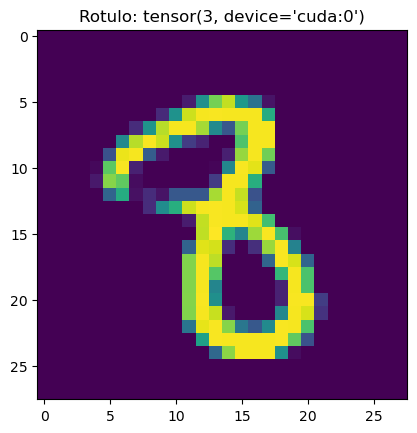

In [102]:
for batch in test_loader:
    dado, rotulo = batch
       
        # cast na GPU
       
    dado   = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])
   
    pred = net(dado)
   
    predicted_class = torch.argmax(pred, dim=1)
   
    #print(predicted_class.to('cpu').data)
   
    plt.figure()
    plt.imshow(dado.to('cpu').data[0][0])
    plt.title('Rotulo: '+ str(predicted_class[0]))
    acuracia_rede(predicted_class,rotulo)
    break